In [3]:
import random
import math
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import statsmodels.api as sm
import timeit
import cv2
from scipy.io import wavfile
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")


## [1] Probability Distributions :

## [A] Continuous distributions

#### Uniform Distribution :

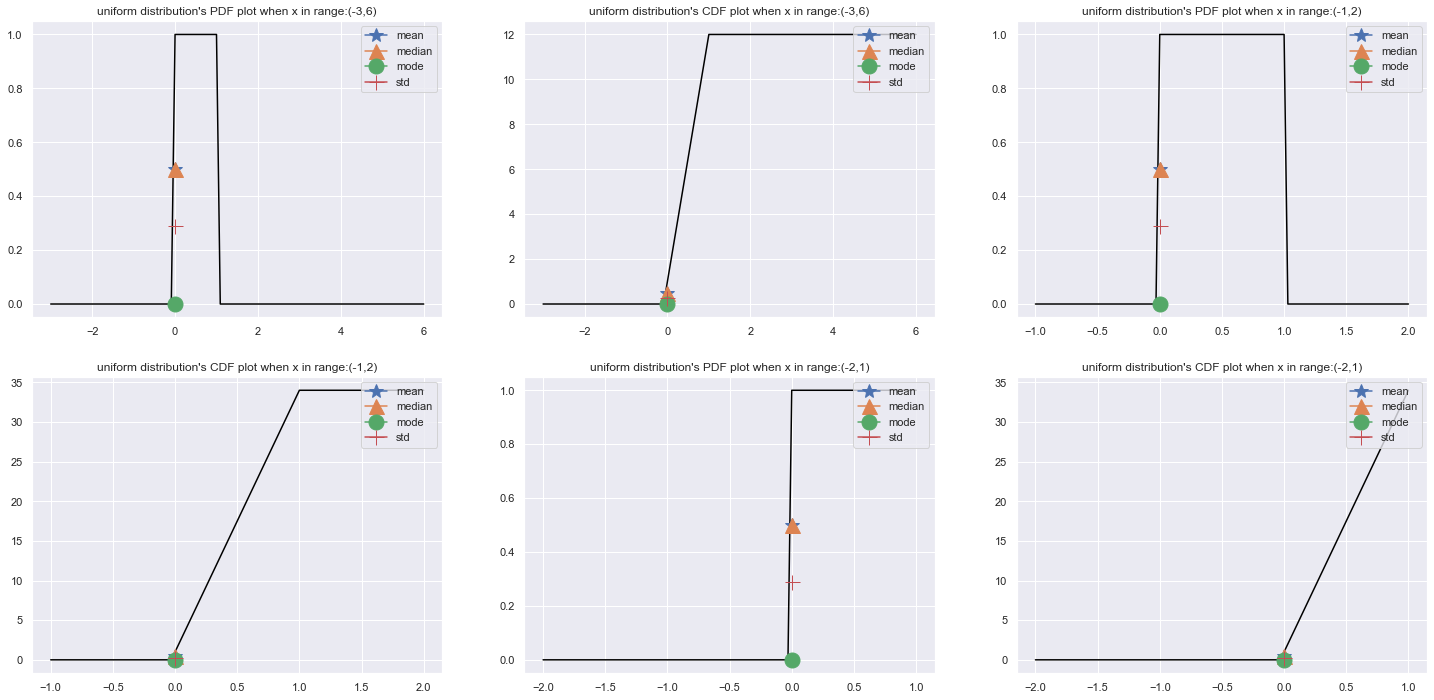

In [220]:
def uniform(x):
    uni_pdf =[]
    uni_cdf =[]
    a =0
    b=1
    mean = (b+a)/2
    st = (b-a)/np.sqrt(12)
    median = (b+a)/2
    mode = random.randrange(a,b)
    for t in x:
        if t>=a and t<=b:
            uni_pdf.append(1)
        else:
            uni_pdf.append(0) 
    uni_cdf = np.cumsum(uni_pdf) 
    return uni_pdf,uni_cdf,mean,median,mode,st
    
t1 = np.linspace(-3,6,100)
t2 = np.linspace(-1,2,100)
t3 = np.linspace(-2,1,100)
t = [t1,t2,t3]
data =["(-3,6)","(-1,2)","(-2,1)"]
p =["PDF","CDF"]
lst =[uniform(t1),uniform(t2),uniform(t3)]
fig , ax = plt.subplots(nrows = 2, ncols = 3,figsize=(25,12))
c =1
for i in range(len(lst)):
    for j in range(0,2):
        plt.subplot(2,3,c)
        plt.plot(t[i],lst[i][j],'black')
        plt.title("uniform distribution's "+str(p[j])+" plot when x in range:"+str(data[i]))
        plt.plot(lst[i][2],marker='*',ms = 15,label= 'mean')
        plt.plot(lst[i][3],marker='^',ms=15,label='median')
        plt.plot(lst[i][4],marker='o',ms=15,label='mode')
        plt.plot(lst[i][5],marker='+',ms = 15,label='std')
        plt.legend(loc='upper right')
        c = c+1

#### Exponential Distribution :

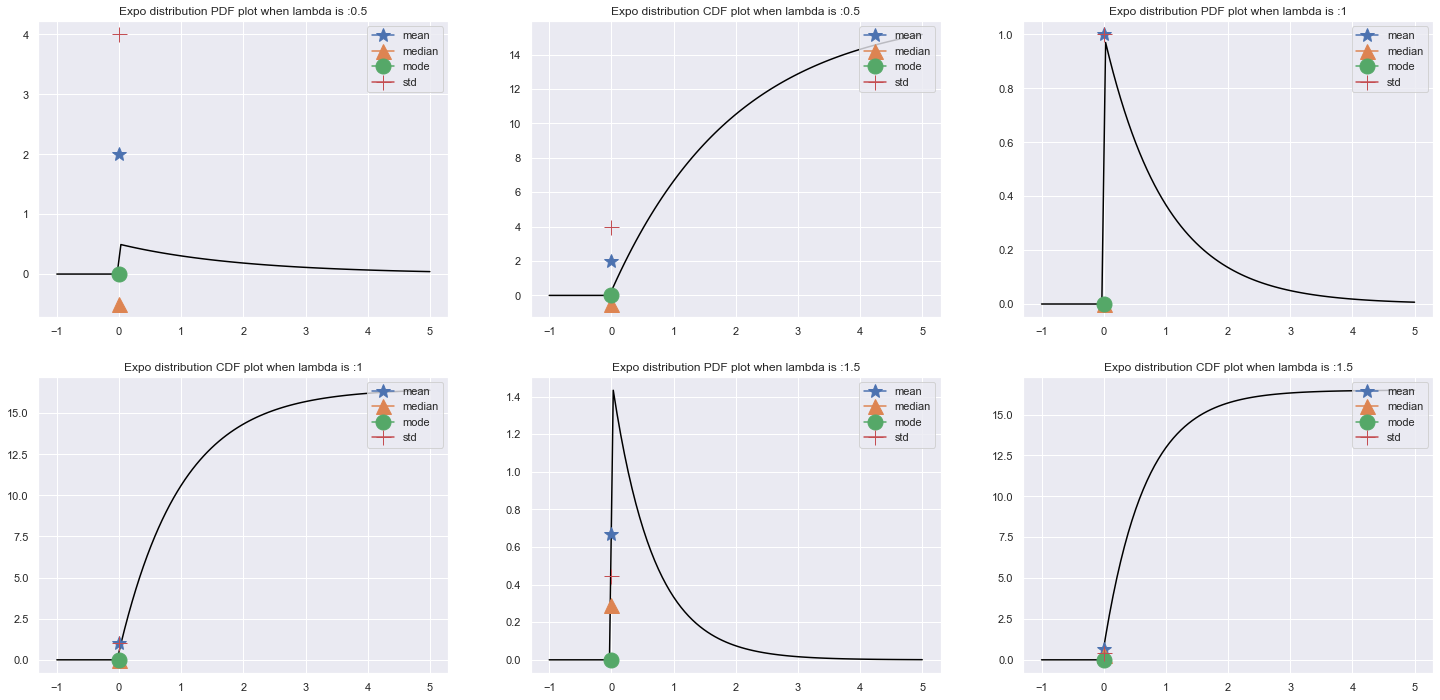

In [221]:
def expo(x,lm):
    ex_pdf =[]
    mean = 1/lm
    st = 1/(lm)**2
    median = np.log2(lm)/2
    mode =0
    for t in x:
        if t>=0:
            a = lm*(np.exp(-lm*t))
            ex_pdf.append(a)
        else:
            ex_pdf.append(0)
    ex_cdf = np.cumsum(ex_pdf)
    
    return ex_pdf,ex_cdf,mean,median,mode,st
x = np.linspace(-1,5,100)
lst =[expo(x,0.5),expo(x,1),expo(x,1.5)]
data =["0.5","1","1.5"]
p =["PDF","CDF"]
fig , ax = plt.subplots(nrows = 2, ncols = 3,figsize=(25,12))
c =1
for i in range(len(lst)):
    for j in range(0,2):
        plt.subplot(2,3,c)
        plt.plot(x,lst[i][j],'black')
        plt.title("Expo distribution "+str(p[j])+" plot when lambda is :"+str(data[i]))
        plt.plot(lst[i][2],marker='*',ms = 15,label= 'mean')
        plt.plot(lst[i][3],marker='^',ms=15,label='median')
        plt.plot(lst[i][4],marker='o',ms=15,label='mode')
        plt.plot(lst[i][5],marker='+',ms = 15,label='std')
        plt.legend(loc='upper right')
        c = c+1


#### Gamma Distribution :

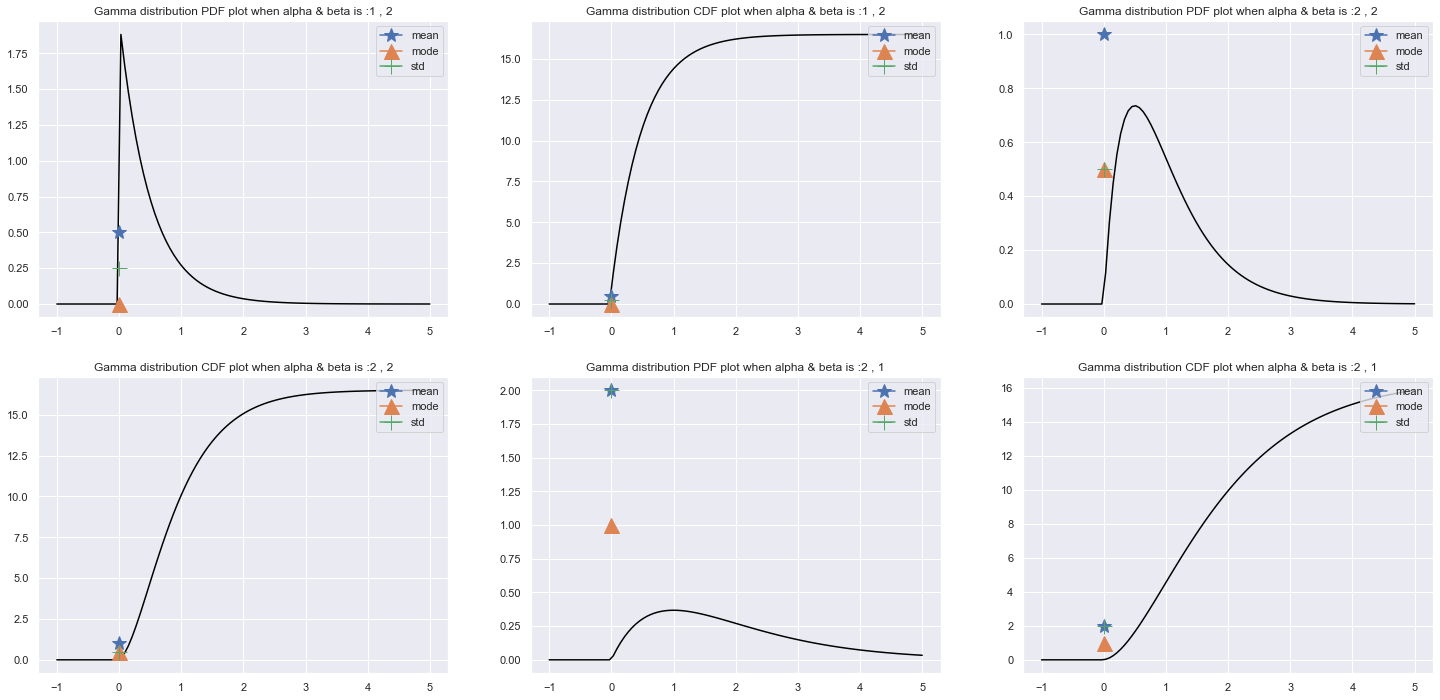

In [222]:
def gamm(x,alpha,beta):
    ga_pdf =[]
    mean = alpha/beta
    st = alpha/(beta)**2
    if alpha>=1:
        mode = (alpha-1)/beta
    else :
        mode=0
    for t in x:
        if t>0:
            a = (beta**alpha)*(t**(alpha-1))*(np.exp(-beta*t))/(math.gamma(alpha))
            ga_pdf.append(a)
        else:
            ga_pdf.append(0)
    ga_cdf = np.cumsum(ga_pdf)
    
    return ga_pdf,ga_cdf,mean,mode,st
x = np.linspace(-1,5,100)

lst =[gamm(x,1,2),gamm(x,2,2),gamm(x,2,1)]
p =["PDF","CDF"]
data =["1 , 2","2 , 2","2 , 1"]
fig , ax = plt.subplots(nrows = 2, ncols = 3,figsize=(25,12))
c =1
for i in range(len(lst)):
    for j in range(0,2):
        plt.subplot(2,3,c)
        plt.plot(x,lst[i][j],'black')
        plt.title("Gamma distribution "+str(p[j])+" plot when alpha & beta is :"+str(data[i]))
        plt.plot(lst[i][2],marker='*',ms = 15,label= 'mean')
        plt.plot(lst[i][3],marker='^',ms=15,label='mode')
        plt.plot(lst[i][4],marker='+',ms = 15,label='std')
        plt.legend(loc='upper right')
        c = c+1

#### Beta Distribution :

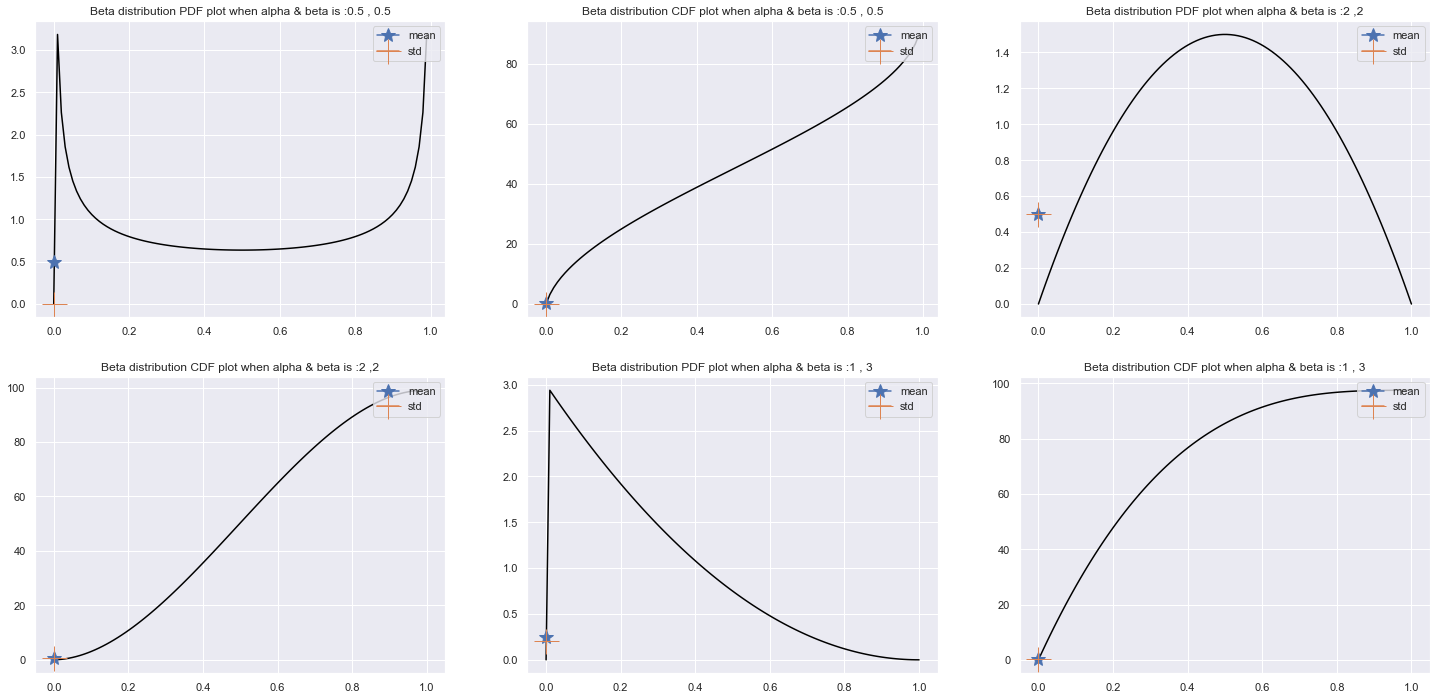

In [223]:
def beta(x,alpha,beta):
    be_pdf =[]
    mean = alpha/(alpha+beta)
    mode = 0
    median =0
    if alpha>=1 and beta>=1:
        mode = mode+(alpha-1)/(alpha+beta-2)
        median = median +(alpha-1/3)/(alpha+beta-2/3)
    elif alpha<=1 and beta>1 :
        mode=0
    elif alpha>1 and beta<=1:
        mode =1
    else:
        median=0
    st = (alpha*beta)/((alpha+beta)**2)*(alpha+beta+1)
    for t in x:
        if t>0:
            a = (t**(alpha-1))*(1-t)**(beta-1)
            b = (math.gamma(alpha))*(math.gamma(beta))/(math.gamma(alpha+beta))
            c = a/b
            be_pdf.append(c)
        else:
            be_pdf.append(0)
    be_cdf = np.cumsum(be_pdf)
    
    return be_pdf,be_cdf,mean,mode,median,st
x = np.linspace(0,1,100)
lst =[beta(x,0.5,0.5),beta(x,2,2),beta(x,1,3)]
p =["PDF","CDF"]
data =["0.5 , 0.5","2 ,2","1 , 3"]
fig , ax = plt.subplots(nrows = 2, ncols = 3,figsize=(25,12))
c =1
for i in range(len(lst)):
    for j in range(0,2):
        plt.subplot(2,3,c)
        plt.plot(x,lst[i][j],'black')
        plt.title("Beta distribution "+str(p[j])+" plot when alpha & beta is :"+str(data[i]))
        plt.plot(lst[i][2],marker='*',ms = 15,label= 'mean')
        plt.plot(lst[i][4],marker='+',ms = 25,label='std')
        plt.legend(loc='upper right')
        c = c+1


#### Gaussian Distribution :

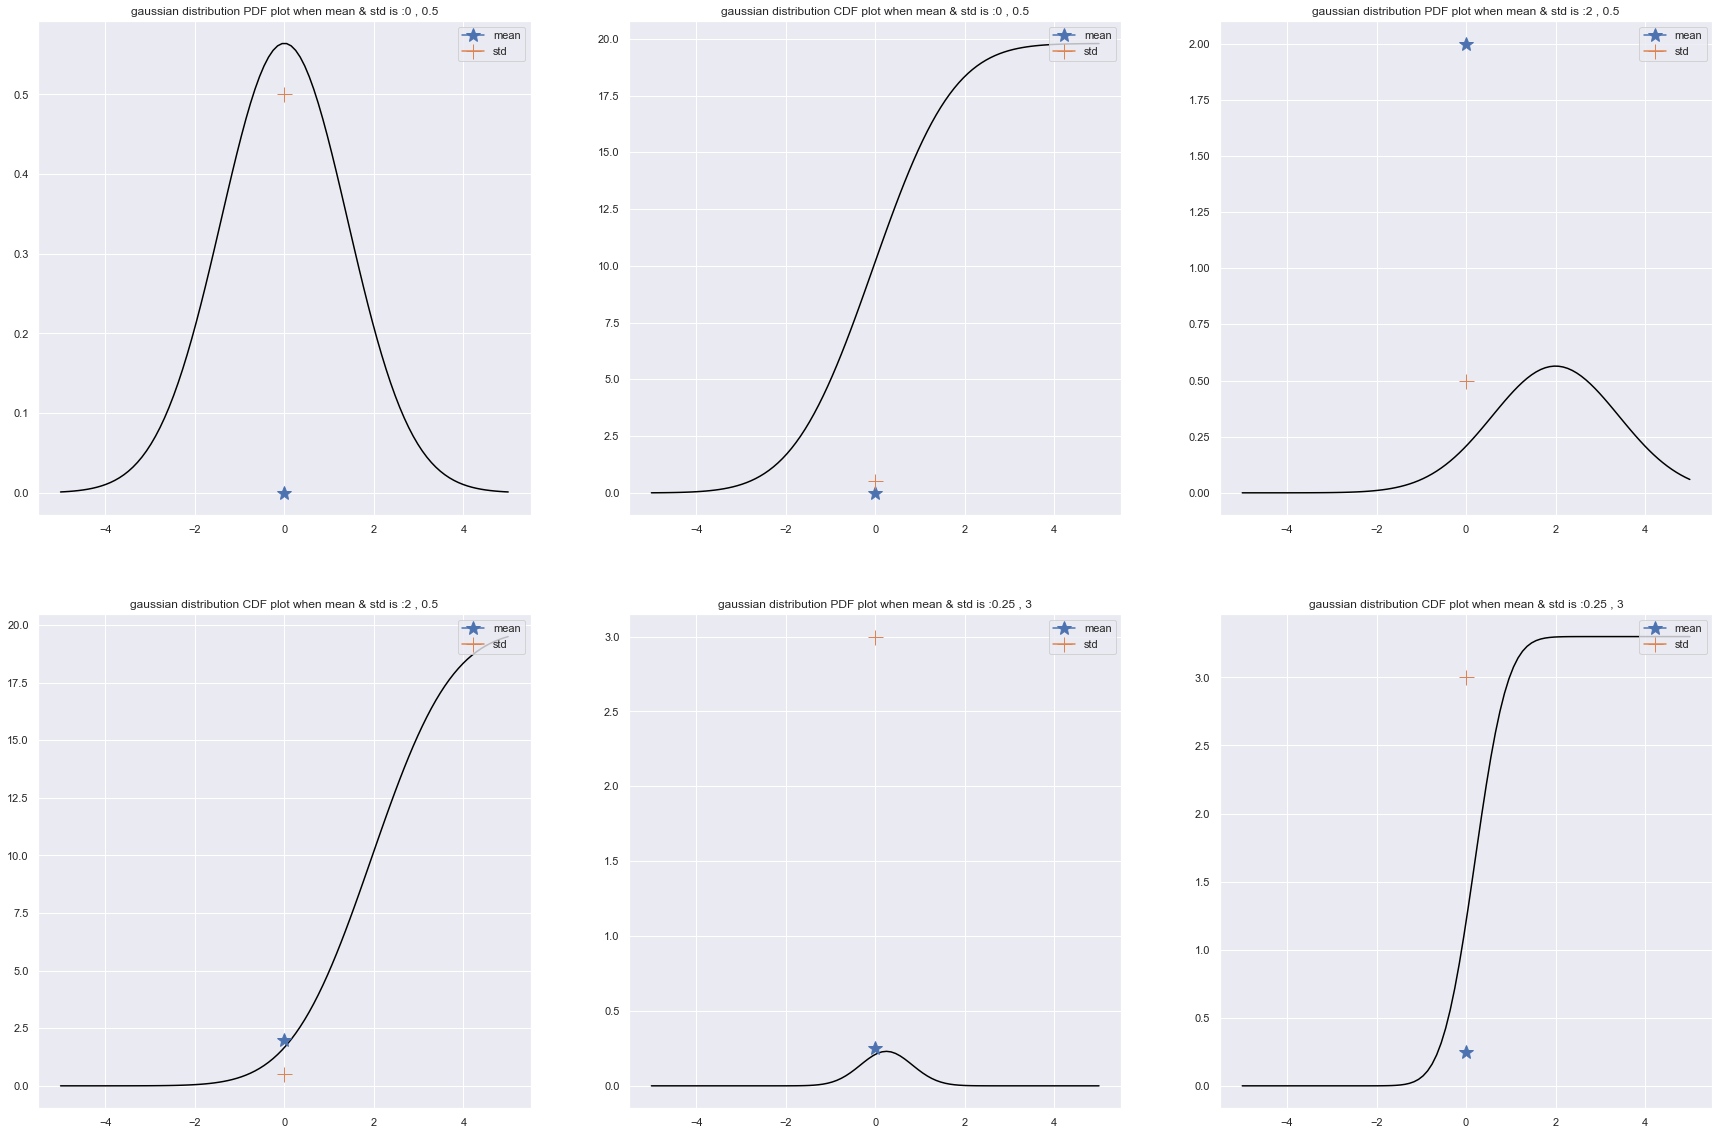

In [224]:
def gau(x,mean,std):
    gau_pdf =[]
    mode =mean
    median = mean 
    for t in x:
        a = (1/np.sqrt(2*np.pi*std))
        b = a*(np.exp((-(t-mean)**2)/2*std))
        gau_pdf.append(b)
    gau_cdf = np.cumsum(gau_pdf)
    return gau_pdf,gau_cdf,mean,mode,std
x = np.linspace(-5,5,100)
lst =[gau(x,0,0.5),gau(x,2,0.5),gau(x,0.25,3)]
data=["0 , 0.5","2 , 0.5","0.25 , 3"]
p =["PDF","CDF"]
fig , ax = plt.subplots(nrows = 2, ncols = 3,figsize=(30,20))
c =1
for i in range(len(lst)):
    for j in range(0,2):
        plt.subplot(2,3,c)
        plt.plot(x,lst[i][j],'black')
        plt.title("gaussian distribution "+str(p[j])+" plot when mean & std is :"+str(data[i]))
        plt.plot(lst[i][2],marker='*',ms = 15,label= 'mean')
        plt.plot(lst[i][4],marker='+',ms = 15,label='std')
        plt.legend(loc='upper right')
        c = c+1

#### Normal Distribution :

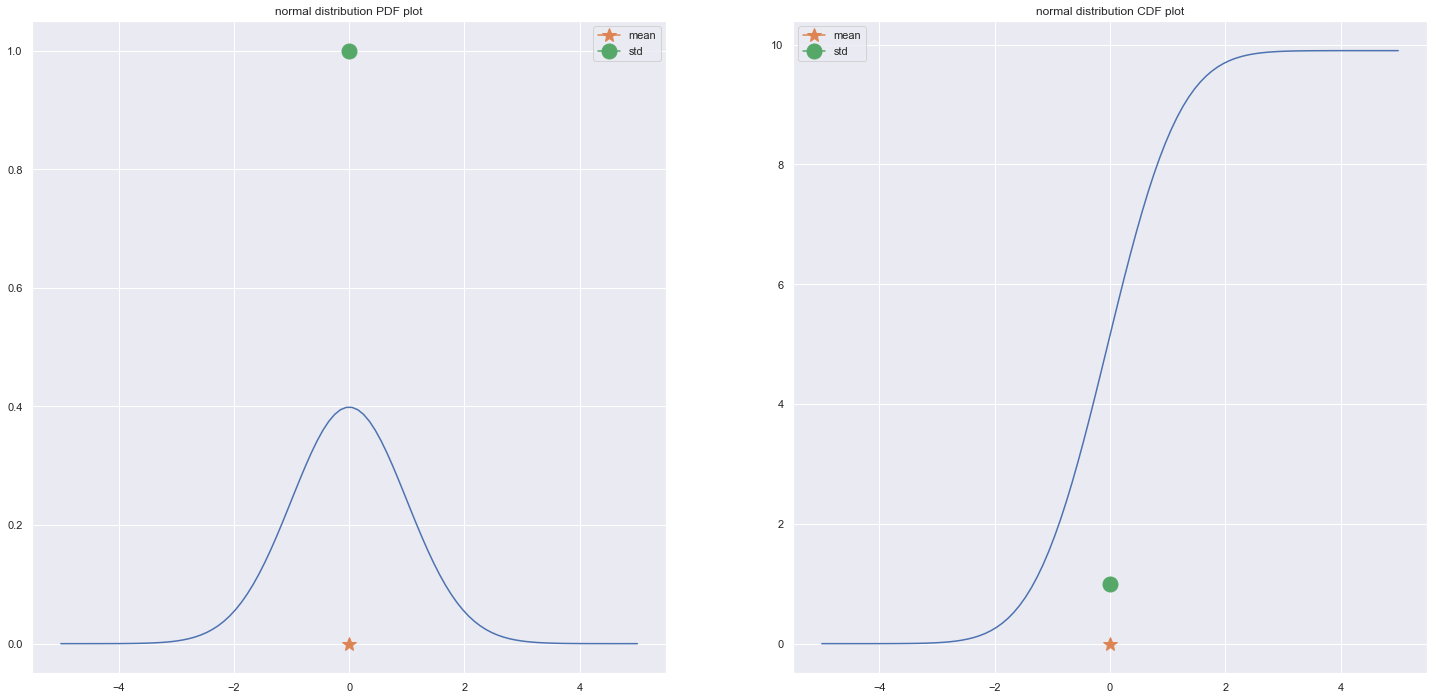

In [225]:
def norm(x):
    gau_pdf =[]
    mean =0
    std = 1
    mode =mean
    median = mean 
    for t in x:
        a = (1/np.sqrt(2*np.pi*std))
        b = a*(np.exp((-(t-mean)**2)/2*std))
        gau_pdf.append(b)
    gau_cdf = np.cumsum(gau_pdf)
    return gau_pdf,gau_cdf,mean,mode,median,std
x1 = np.linspace(-5,5,100)
a =norm(x1)
p=["PDF","CDF"]
fig , ax = plt.subplots(nrows = 1, ncols = 2,figsize=(25,12))
c=1
for i in range(2):
    plt.subplot(1,2,c)
    plt.plot(x1,a[i])
    plt.title("normal distribution "+str(p[i])+" plot")
    plt.plot(a[2],marker='*',ms=15,label = 'mean')
    plt.plot(a[5],marker='o',ms=15,label='std')
    plt.legend()
    c=c+1

#### Chi-Squared Distribution :

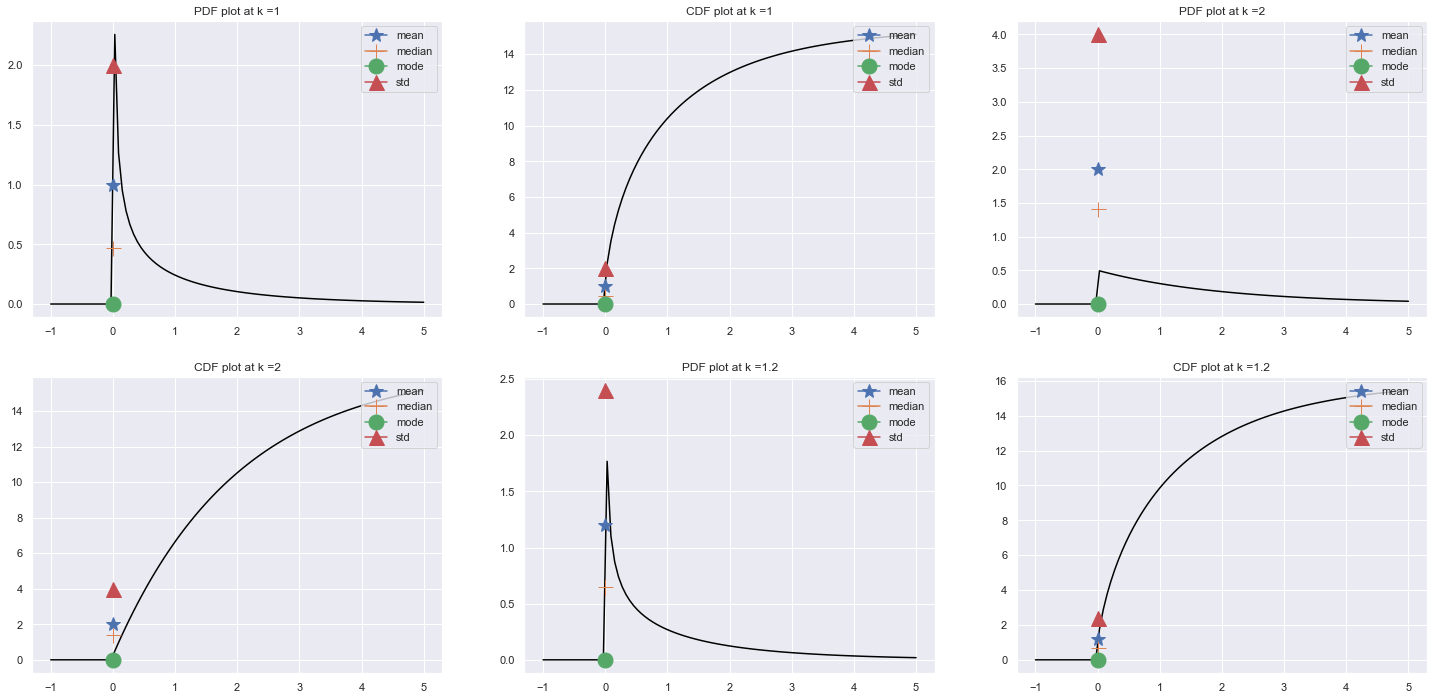

In [226]:
def chi(x,k):
    chi_pdf =[]
    mean = k
    st = 2*k
    median = k*((1-2/(9*k))**3)
    mode =max(k-2,0)
    
    for t in x:
        if t>=0:
            a = (t**(k/2 -1))*(np.exp(-t/2))
            b = (2**(k/2))*(math.gamma(k/2))
            c = a/b
            chi_pdf.append(c)
        else:
            chi_pdf.append(0)
    chi_cdf = np.cumsum(chi_pdf)
    
    return chi_pdf,chi_cdf,mean,median,mode,st
x = np.linspace(-1,5,100)
lst =[chi(x,1),chi(x,2),chi(x,1.2)]
k =[1,2,1.2]
p =["PDF","CDF"]
fig , ax = plt.subplots(nrows = 2, ncols = 3,figsize=(25,12))
c =1
for i in range(len(lst)):
    for j in range(0,2):
        plt.subplot(2,3,c)
        plt.plot(x,lst[i][j],'black')
        plt.plot(lst[i][2],marker='*',ms = 15,label= 'mean')
        plt.plot(lst[i][3],marker='+',ms = 15,label='median')
        plt.plot(lst[i][4],marker='o',ms = 15,label='mode')
        plt.plot(lst[i][5],marker='^',ms = 15,label='std')
        plt.legend(loc='upper right')
        plt.title(str(p[j])+" plot at k ="+str(k[i]))
        c = c+1

#### Chi_Squared Power Distribution 

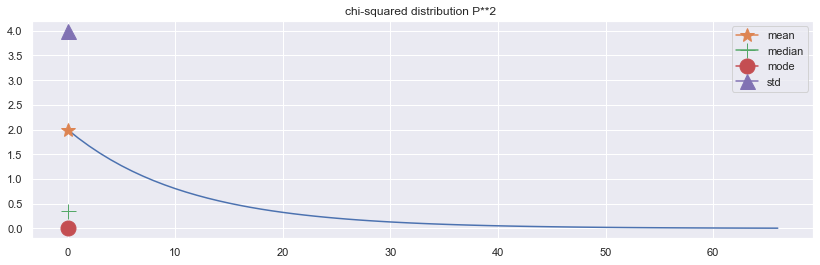

In [227]:
def ch_sq(t,k,var):
    var =4
    k = 2
    mean = k
    median = k*(1-2/9*k)**3
    mode = max(k-2,0)
    std = 2*k
    den = 1/((2)**(k/2))*(math.gamma(k/2))*(var)
    P = [ (den*(((i)**(k/2-1))*np.exp(-(i/2)/2*var))) for i in t1 if i>=0]
    return P,mean,median,mode,std

t = np.linspace(-10,10,100)
out = ch_sq(t,2,4)
plt.plot(out[0])   
plt.title("chi-squared distribution P**2 ")
plt.plot(out[1],marker='*',ms = 15,label= 'mean')
plt.plot(out[2],marker='+',ms = 15,label='median')
plt.plot(out[3],marker='o',ms = 15,label='mode')
plt.plot(out[4],marker='^',ms = 15,label='std')
plt.legend(loc='upper right')
plt.show()

## [B] Discrete distributions :

mean of bernouli 1 distribution at p(failure)=0.1 is:  0.09000000000000001
variance of bernouli 1 distribution at p(failure)=0.1 is:  0.09000000000000001
mean of bernouli 2 distribution at p(failure)=0.5 is:  0.25
variance of bernouli 2 distribution at p(failure)=0.5 is:  0.25
mean of bernouli 3 distribution at p(failure)=0.8 is:  0.15999999999999998
variance of bernouli 3 distribution at p(failure)=0.8 is:  0.15999999999999998
mean of binomial distribution at n=20,p=0.4 is:  4.8
variance of binomial distribution at n=20,p=0.4 is:  4.8
mean of geometric distribution at p=0.5 is:  2.0
variance of geometric distribution at p=0.5 is:  2.0
mean of poisson distribution at lamda=5 is:  5
variance of poisson distribution at lamda=5 is:  5


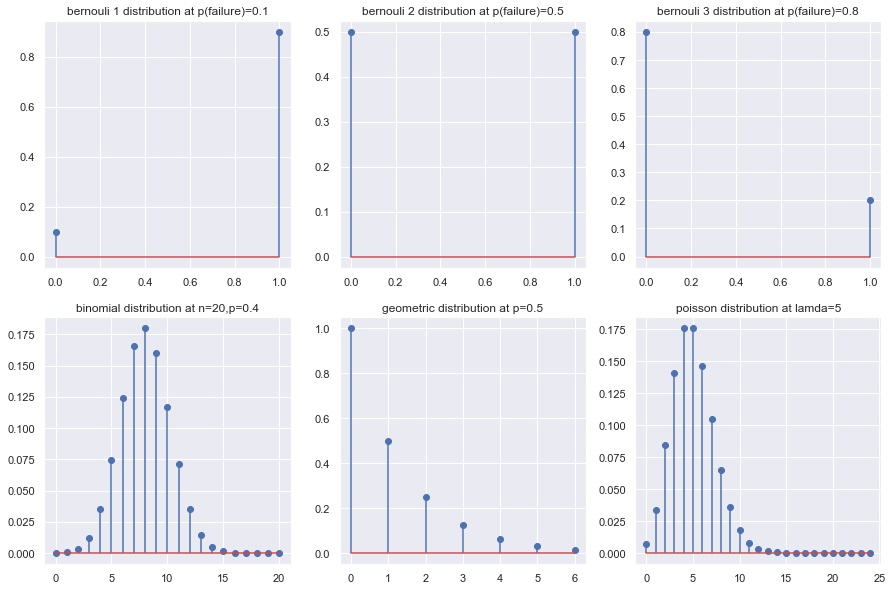

In [228]:
def bernouli(p):
    x =[0,1]
    mean =(1-p)
    var =p*(1-p)
    ber_pmf=[]
    for i in x:
        if (i==0):
            ber_pmf.append(p)
        if i==1:
            ber_pmf.append(1-p)
    return ber_pmf,mean,var

def binomial(n,p):
    mean = n*p
    var =n*p*(1-p)
    bio_pmf=[]
    for r in range(n+1):
        y=(math.factorial(n)/(math.factorial(n-r)*math.factorial(r)))*(p**r)*((1-p)**(n-r))
        bio_pmf.append(y)
    return bio_pmf,mean,var

def Geometric(p):
    mean = 1/p
    var = (1-p)/p**2
    geo_pmf=[]
    for k in range(7):
        if p>=0.01:
            y=((1-p)**(k-1))*p
            geo_pmf.append(y)      
    return geo_pmf,mean,var

def poisson(lamda):
    mean = lamda
    var = lamda
    p_pmf=[]
    for k in range(0,25):
        y=((lamda**k)*(np.exp(-lamda)))/math.factorial(k)
        p_pmf.append(y)    
    return p_pmf,mean,var

out=[bernouli(0.1),bernouli(0.5),bernouli(0.8),binomial(20,0.4),Geometric(0.5),poisson(5)]
name = ["bernouli 1","bernouli 2","bernouli 3","binomial","geometric","poisson"]
data=["p(failure)=0.1","p(failure)=0.5","p(failure)=0.8","n=20,p=0.4","p=0.5","lamda=5"]

fig , ax = plt.subplots(nrows = 2, ncols = 3,figsize=(15,10))    
c = 1 
for i in range(len(out)):
    plt.subplot(2,3,c)
    plt.stem(out[i][0],use_line_collection=True)
    plt.title(str(name[i])+" distribution at "+str(data[i]))
    print("mean of "+str(name[i])+" distribution at "+str(data[i])+" is: ",out[i][2])
    print("variance of "+str(name[i])+" distribution at "+str(data[i])+" is: ",out[i][2])
    c =c+1

## [2] Signal measures :

In [229]:
x1 = [1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 1]
x2= [1, 2, 1, 2, 1, 2, 1, 2]
x3 = [1, 2, 3, 2, 4, 6, 4, 8, 12]
x4 = [2, 4, 2, 4, 2, 4, 2, 4]
x5 =  [1, -2, 3, -2, 1, -2, 3, -4, 3, -2, 1] 
x6 =[2*x1[n]+1 for n in range(len(x1))]     
x = [x1,x2,x3,x4,x5,x6]

In [230]:
def autocorrelation(sequence1,sequence2,delay):
    n =len(sequence1)
    m = len(sequence2)
    if (n-m) !=0 :
        if n<m:
            sequence1 = list(np.pad(sequence1, (abs(n-m),0),'constant'))
        else:
            sequence2 = list(np.pad(sequence2,(abs(n-m),0),'constant'))
    mean1 = (1/n)*(sum(sequence1))
    mean2 = (1/n)*(sum(sequence2))
    den=np.sqrt(sum([(sequence1[i]-mean1)**2 for i in range(n)]))*np.sqrt(sum([(sequence2[i]-mean2)**2 for i in range(n)]))
    num =[den]
    de =[i+1 for i in range(delay)]
    for k in de :
        s =0
        for i in range(n-k):
            a = (sequence1[i]-mean1)*(sequence2[i+k]-mean2)
            s = s+a
        num.append(s)
    auto_corr = [num[i]/den for i in range(len(num))]    
    return auto_corr


0) auto correlation using inbulit library: [ 1.          0.33619211 -0.39365352]
 auto correlation using user function: [1.0, 0.33619210977701547, -0.3936535162950257]
1) auto correlation using inbulit library: [ 1.    -0.875  0.75 ]
 auto correlation using user function: [1.0, -0.8749999999999998, 0.7499999999999999]
2) auto correlation using inbulit library: [1.         0.41723356 0.10997732]
 auto correlation using user function: [1.0, 0.4172335600907029, 0.10997732426303848]
3) auto correlation using inbulit library: [ 1.    -0.875  0.75 ]
 auto correlation using user function: [1.0, -0.8749999999999998, 0.7499999999999999]
4) auto correlation using inbulit library: [ 1.         -0.90322581  0.72580645]
 auto correlation using user function: [1.0, -0.9032258064516129, 0.7258064516129032]
5) auto correlation using inbulit library: [ 1.          0.33619211 -0.39365352]
 auto correlation using user function: [1.0, 0.3361921097770154, -0.39365351629502593]


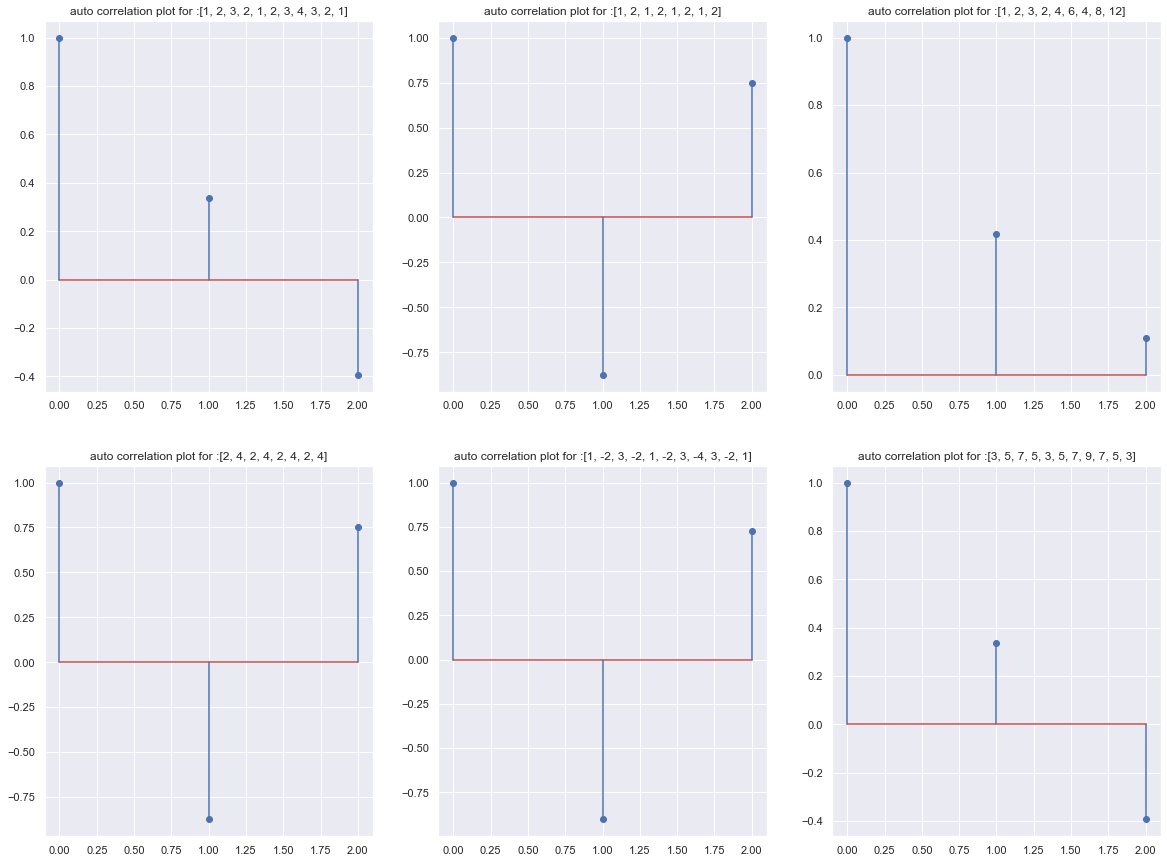

In [231]:
inbulit =[sm.tsa.acf(x[i], nlags=2) for i in range(len(x))]
a = [autocorrelation(x[i],x[i],2) for i in range(len(x))]
for i in range(len(a)):
    print(str((i))+") auto correlation using inbulit library:", str(inbulit[i]))
    print(" auto correlation using user function:", str(a[i]))
fig , ax = plt.subplots(nrows = 2, ncols = 3,figsize=(20,15))    
c = 1 
for i in range(0,6):
    plt.subplot(2,3,c)
    plt.stem(a[i])
    plt.title("auto correlation plot for :"+str(x[i]))
    c = c+1

0)cross correlation of x1 and x2 at lag 2 : [1.0, 0.30993385103046694, 0.28562531369474403]
1)cross correlation of x1 and x3 at lag 2 : [1.0, 0.2745187231627387, 0.4781047561122865]
2)cross correlation of x1 and x4 at lag 2 : [1.0, 0.30993385103046694, 0.28562531369474403]
3)cross correlation of x1 and x5 at lag 2 : [1.0, 0.0892618989509348, -0.21199701000847015]
4)cross correlation of x1 and x6 at lag 2 : [1.0, 0.3361921097770154, -0.39365351629502576]
5)cross correlation of x2 and x3 at lag 2 : [1.0, 0.4949775907203429, 0.13423121104280486]
6)cross correlation of x2 and x4 at lag 2 : [1.0, -0.8749999999999998, 0.7499999999999999]
7)cross correlation of x2 and x5 at lag 2 : [1.0, -0.17860862707794006, 0.07654655446197431]
8)cross correlation of x2 and x6 at lag 2 : [1.0, 0.44924705526766295, 0.5043160491391829]
9)cross correlation of x3 and x4 at lag 2 : [1.0, 0.08979133729352982, -0.15713484026367724]
10)cross correlation of x3 and x5 at lag 2 : [1.0, 0.03025445104080258, 0.010084817

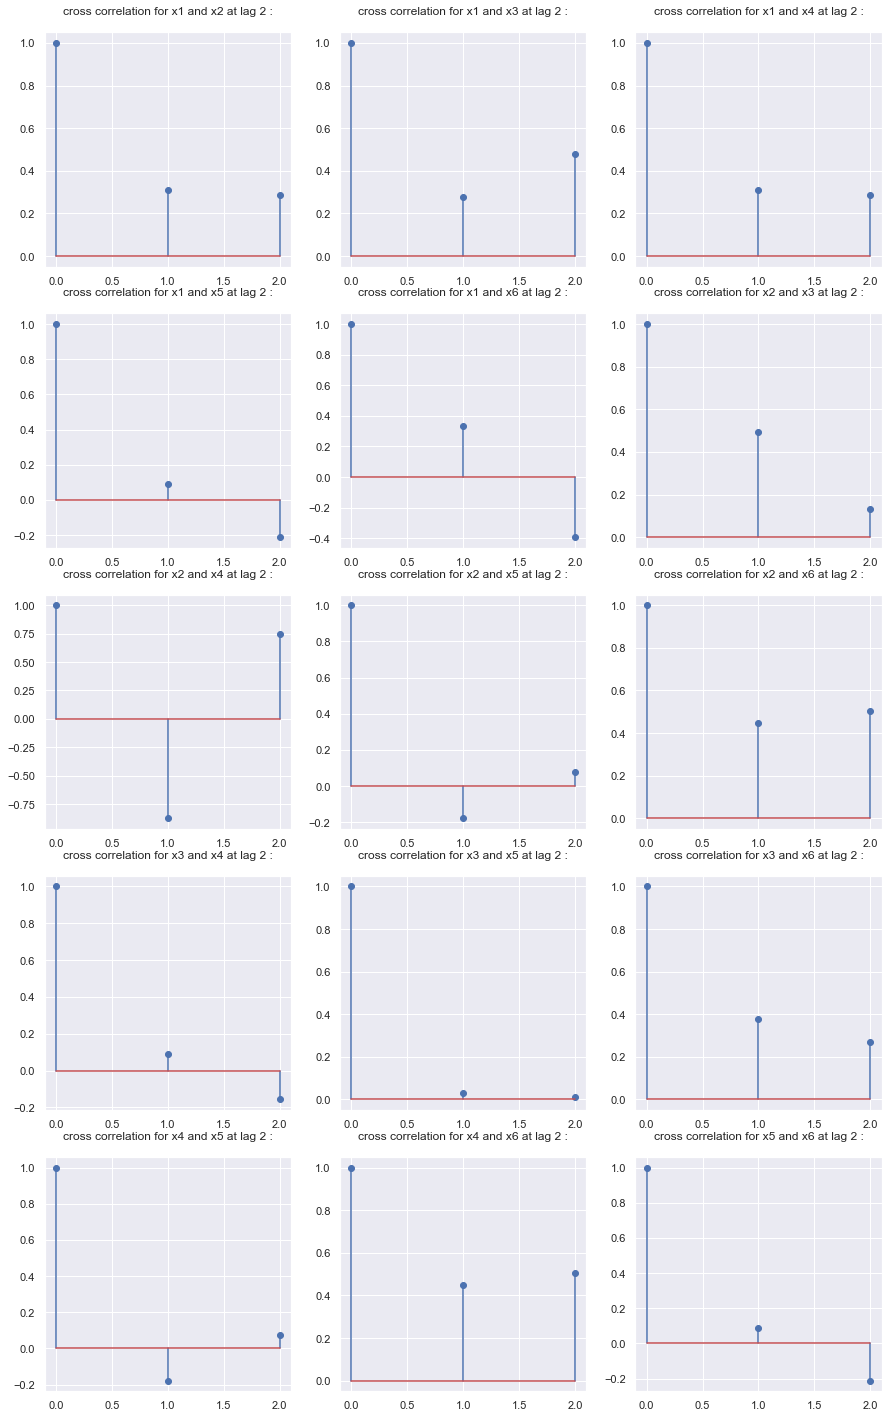

In [232]:
cross =[autocorrelation(x[i],x[i+j+1],2) for i in range(len(x)-1) for j in range(len(x)-1) if i+j+1 < len(x) ]
name = ["x"+str(i+1)+" and x"+str(i+j+2) for i in range(len(x)-1) for j in range(len(x)-1) if i+j+1 < len(x) ]
for i in range(len(cross)):
    print(str((i))+")cross correlation of "+str(name[i])+" at lag 2 :", str(cross[i]))
fig , ax = plt.subplots(nrows = 5, ncols = 3,figsize=(15,25))    
c = 1 
for i in range(len(cross)):
    plt.subplot(5,3,c)
    plt.stem(cross[i])
    plt.title("cross correlation for "+str(name[i])+" at lag 2 :\n")
    c = c+1

In [233]:
inbulid =[sm.tsa.acf(x[i], nlags=2) for i in range(len(x))]
a = [autocorrelation(x[i],x[i],2) for i in range(len(x))]
for i in range(len(a)):
    inb= timeit.timeit(stmt = "inbulid[i]",number=1,globals=globals())
    user = timeit.timeit(stmt = "a[i]",number=1,globals=globals())
    diff = inb - user
    print("time for inbulid function :",inb)
    print("time for my function :",user)
    print("time difference :\n",diff)

time for inbulid function : 7.00001692166552e-07
time for my function : 3.9999940781854093e-07
time difference :
 3.00002284348011e-07
time for inbulid function : 1.0000003385357559e-06
time for my function : 7.999988156370819e-07
time difference :
 2.00001522898674e-07
time for inbulid function : 7.999988156370819e-07
time for my function : 8.00002453615889e-07
time difference :
 -3.637978807091713e-12
time for inbulid function : 7.999988156370819e-07
time for my function : 6.000009307172149e-07
time difference :
 1.9999788491986692e-07
time for inbulid function : 6.999980541877449e-07
time for my function : 7.00001692166552e-07
time difference :
 -3.637978807091713e-12
time for inbulid function : 6.000009307172149e-07
time for my function : 3.9999940781854093e-07
time difference :
 2.00001522898674e-07


## [3] Noise :


###### WHITE NOISE : .
White noise has zero mean, constant variance, and is uncorrelated in time. As its
name suggests, white noise has a power spectrum which is uniformly spread
across all allowable frequencies.

###### RED NOISE :
Red noise has zero mean, constant variance, and is serially correlated in time,
such that the lag-1 autocorrelation between two successive time samples has
correlation coefficient 0 < r < 1. 
###### generate a n(0, 1) red noise sequence xj from a white noise sequence wj , we set
x1 = w1

x(j+1) = rxj + ((1 − r**2)*0.5)*(wj+1) , j ≥ 1

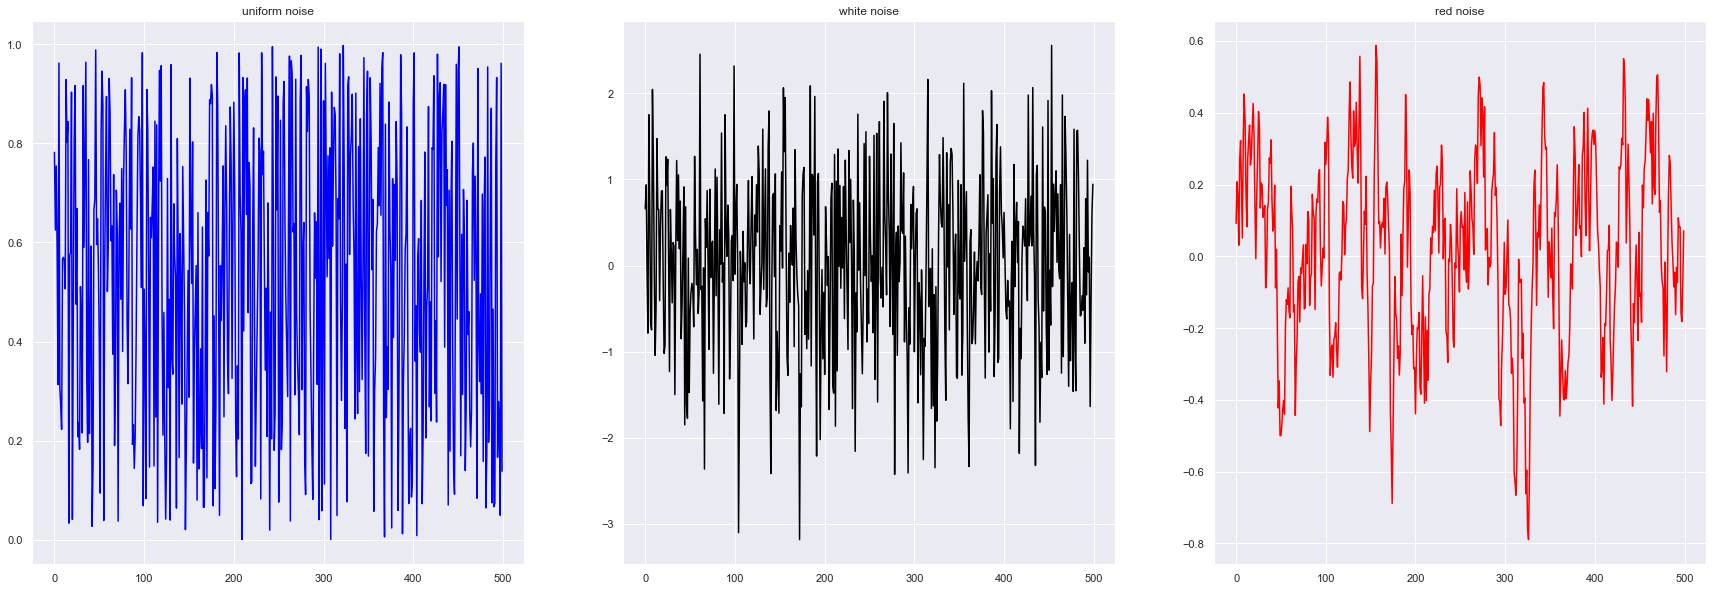

In [234]:
unif = np.random.uniform(0,1,500) # mean =0,std =1 noise
wh_no = [np.random.normal(0, 1) for i in range(500)] # white noise seqquence
def red_noise(white): # red noise sequence
    r=0.85
    red=[0]
    for i in range(len(white)):
        x = r*(red[i]) +((1-r**2)*0.5)*(white[i])
        red.append(x)
    return red[1:]

noise =[unif , wh_no,red_noise(wh_no)]
name =["uniform","white","red"]
colors = ["blue","black","red"]
fig , ax = plt.subplots(nrows = 1, ncols = 3,figsize=(30,10))    
c = 1 
for i in range(len(noise)):
    plt.subplot(1,3,c)
    plt.plot(noise[i],color=colors[i])
    plt.title(str(name[i])+" noise")
    c = c+1

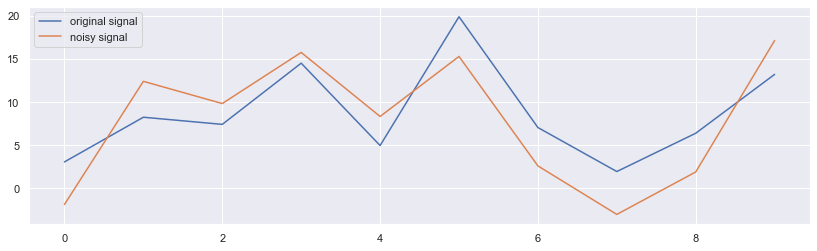

In [235]:
n=np.arange(0,10)
A = [np.random.uniform(0,4) for i in range(10)]
phi = [np.random.uniform(0,2*np.pi) for i in range(10)]
x = A*(np.cos(0.2*n)+phi)

env= [random.gauss(0,1) for i in range(10)]
noise=[5*(np.sin(2*np.pi*i)) for i in env]

total = x + noise

plt.plot(x,label='original signal')
plt.plot(total,label = 'noisy signal')
plt.legend()
plt.show()

## Bonus :

Image Properties :
Number of Pixels: 334170
Shape/Dimensions: (235, 474, 3)


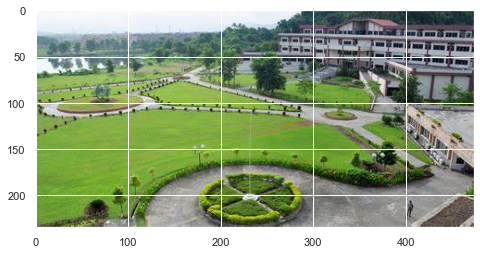

In [236]:
import cv2
#read image 
img = cv2.imread('C:/Users/sonuk/OneDrive/Documents/iitg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#show image
plt.imshow(img)    
print("Image Properties :")
print("Number of Pixels: " + str(img.size))
print("Shape/Dimensions: " + str(img.shape))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


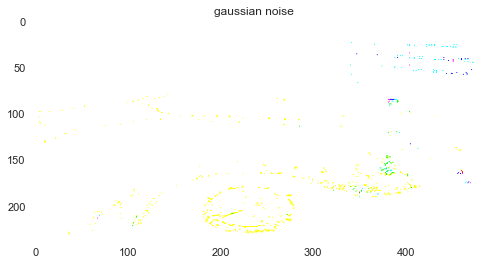

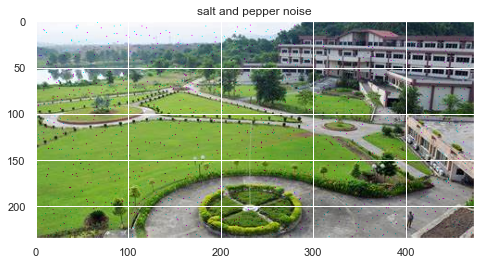

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


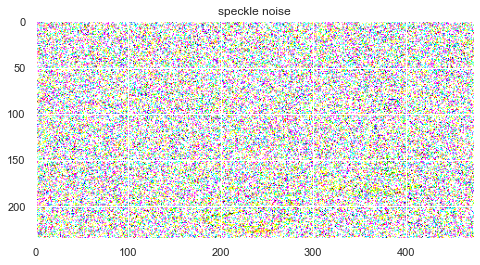

In [237]:
def noisy(noise_type,image):
    row,col,channel= image.shape
    if noise_type == "gauss":
        gauss = np.random.normal(0,0.08,(row,col,channel))
        gauss = gauss.reshape(row,col,channel)
        noisy = image + gauss
        return noisy
    elif noise_type == "salt and pepper":
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        salt = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        out[salt] = 1
        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        pepper = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        out[pepper] = 0
        return out
    elif noise_type =="speckle":
        gauss = np.random.randn(row,col,channel)
        gauss = gauss.reshape(row,col,channel)        
        noisy = image + image * gauss
        return noisy
a = [noisy("gauss",img),noisy("salt and pepper",img),noisy("speckle",img)]
name =["gaussian","salt and pepper","speckle"]
#show image
for i in range(len(a)):
    plt.imshow(a[i]) 
    plt.title(str(name[i])+" noise")
    plt.show()
